In [5]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from bs4 import BeautifulSoup
import requests
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils
import area_under_curve as auc
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt


In [11]:
carbonSequesteredDf = pd.read_csv("static/data/TheGreatCarbonSinkInfo-Carbon-Rate.csv")

In [12]:
carbonSequesteredDf.tail(11)

,Age of Tree,Maple,Oak,Sycamore,Pine,Fir,Elm,Willow,Magnolia,Birch,Tulip,Butternut,Cedar
49,49,66.1,29.7,119.6,23.2,103.4,66.1,119.6,66.1,66.1,66.1,66.1,54.8
50,50,67.8,30.4,122.7,23.9,106.3,67.8,122.7,67.8,67.8,67.8,67.8,56.3
51,51,69.4,31.1,125.7,24.5,109.3,69.4,125.7,69.4,69.4,69.4,69.4,57.9
52,52,71.1,31.9,128.8,25.2,112.3,71.1,128.8,71.1,71.1,71.1,71.1,59.4
53,53,72.8,32.6,131.8,25.8,115.4,72.8,131.8,72.8,72.8,72.8,72.8,61.0
54,54,74.5,33.4,134.9,26.5,118.4,74.5,134.9,74.5,74.5,74.5,74.5,62.6
55,55,76.2,34.1,138.0,27.2,121.5,76.2,138.0,76.2,76.2,76.2,76.2,64.2
56,56,77.9,34.8,141.2,27.8,124.6,77.9,141.2,77.9,77.9,77.9,77.9,65.9
57,57,79.6,35.6,144.3,28.5,128.7,79.6,144.3,79.6,79.6,79.6,79.6,67.5
58,58,81.3,36.3,147.5,29.2,130.9,81.3,147.5,81.3,81.3,81.3,81.3,69.2


In [1]:
# Max lifespan for each tree type
life_span = {
"Maple" : 300,
"Oak" : 1000,
"Sycamore" : 600,
"Pine" : 200,
"Fir" : 1000,
"Elm" : 150,
"Willow" : 75,
"Magnolia" : 120,
"Birch" : 50,
"Tulip" : 500,
"Butternut" : 75,
"Cedar" : 1000,
}

# total squestered carbon per type
total_sequestered = {
  'Maple': 54,
#  'Oak': 1450,
 'Sycamore': 348,
 'Pine': 19,
#  'Fir': 1450,
 'Elm': 10,
 'Willow': 2,
 'Magnolia': 6,
 'Birch': 1,
 'Tulip': 211,
 'Butternut': 2,}
#  'Cedar': 1450}

In [24]:
total_sequestered = {}

for tree in life_span.keys():

    # Sample data
    x = np.arange(60)
    y = carbonSequesteredDf['Maple'].values

    # Fit with polyfit
    b, m= polyfit(x, y, 1)
    p = np.poly1d(np.polyfit(x, y, 2))

    total_sequestered_over_life = []
    for i in range(0,life_span[tree]):
        total_sequestered_over_life.append(p(i))
        
    total_sequestered[tree] = round(sum(total_sequestered_over_life)/2000)

In [25]:
total_sequestered

{'Maple': 54,
 'Oak': 1450,
 'Sycamore': 348,
 'Pine': 19,
 'Fir': 1450,
 'Elm': 10,
 'Willow': 2,
 'Magnolia': 6,
 'Birch': 1,
 'Tulip': 211,
 'Butternut': 2,
 'Cedar': 1450}

In [30]:
total_carbon = []
for i in range(0,60):
    total_carbon.append(p(i))

In [33]:
sum(total_carbon)

2290.0999999999995

In [407]:
clf = LogisticRegression()
clf.fit(x, training_scores_encoded)
print("LogisticRegression")


LogisticRegression


In [34]:
carbonSequesteredDf.head()

,Age of Tree,Maple,Oak,Sycamore,Pine,Fir,Elm,Willow,Magnolia,Birch,Tulip,Butternut,Cedar
0,0,1.9,1.3,2.7,0.7,1.4,1.9,2.7,1.9,1.9,1.9,1.9,1.0
1,1,2.7,1.6,4.0,0.9,2.2,2.7,4.0,2.7,2.7,2.7,2.7,1.5
2,2,3.5,2.0,5.4,1.1,3.1,3.5,5.4,3.5,3.5,3.5,3.5,2.0
3,3,4.3,2.4,6.9,1.4,4.1,4.3,6.9,4.3,4.3,4.3,4.3,2.5
4,4,5.2,2.8,8.5,1.6,5.2,5.2,8.5,5.2,5.2,5.2,5.2,3.1


In [36]:
carbonSequesteredDf.columns[1:]

Index(['Maple', 'Oak', 'Sycamore', 'Pine', 'Fir', 'Elm', 'Willow', 'Magnolia',
       'Birch', 'Tulip', 'Butternut', 'Cedar'],
      dtype='object')

In [42]:
fig = go.Figure()

for tree in carbonSequesteredDf.columns[1:]:
    x = np.arange(60)
    y = carbonSequesteredDf[tree].values

    # Fit with polyfit
    p = np.poly1d(np.polyfit(x, y, 2))
    fig.add_trace(go.Scatter(
        x=x,
        y=y,
        name=tree
    ))

fig.update_layout(
title=f"Carbon Sequestered By {tree} Over Time",
xaxis_title="Tree Age (years)",
yaxis_title="Carbon Sequestered (lbs)")

In [29]:
total_sequestered

{'Maple': 54,
 'Oak': 1450,
 'Sycamore': 348,
 'Pine': 19,
 'Fir': 1450,
 'Elm': 10,
 'Willow': 2,
 'Magnolia': 6,
 'Birch': 1,
 'Tulip': 211,
 'Butternut': 2,
 'Cedar': 1450}

In [31]:
import plotly.express as px
sequestered_data = pd.DataFrame({"Tree" : total_sequestered.keys() , "Total Sequestered" : total_sequestered.values()})
fig = px.bar(sequestered_data, x='Tree', y='Total Sequestered')
fig.show()

In [ ]:
metrics = {
    "House Build" : 65,
    "General consumerism" : 16,
    "Family flight to Spain" : 10,
    "Meat based diet" : 12,
    "UK average mileage" : 4.6,
    "Gas central heating" : 2.25,
    "Electricity" : 0.75,
    "Water supply" : 0.2
}

In [376]:
maple_df_extrapolated = maple_df.append({"Age of Tree" : x-59, "Maple" : y}, ignore_index=True)

In [377]:
maple_df_extrapolated.tail(5)

,Maple,Age of Tree
56,77.900000,56.0
57,79.600000,57.0
58,81.300000,58.0
59,83.000000,59.0
60,117.562651,101.0


In [378]:
maple_df_extrapolated["Maple"].sum() * 3.67

8836.121927710843

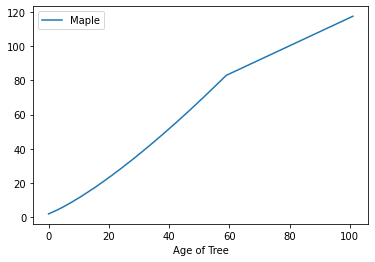

In [379]:
maple_df_extrapolated.plot(x="Age of Tree")